In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

In [2]:
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

Shape Describe and head,tail

In [3]:
print("Columns and Rows in Trainining dataset -",dataset_train.shape)
print("Columns and Rows in test dataset -",dataset_test.shape)

Columns and Rows in Trainining dataset - (1460, 81)
Columns and Rows in test dataset - (1459, 80)


In [4]:
dataset_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dataset_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
dataset_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
dataset_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Removing Columns having more than 50% of the data Missing  

Looking at percentage of missing value in each fearure

In [8]:
#Getting the count of the highest percentage of missing values
Count = dataset_train.isnull().sum().sort_values(ascending=False)
#Calculation for percentage
percent = (dataset_train.isnull().sum()/dataset_train.isnull().count()).sort_values(ascending=False)
#Creating a dataframe and appending columns and the percentage
missing_data = pd.concat([Count, percent], axis=1, keys=['Total', 'Percent'])
#Printing top 25
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


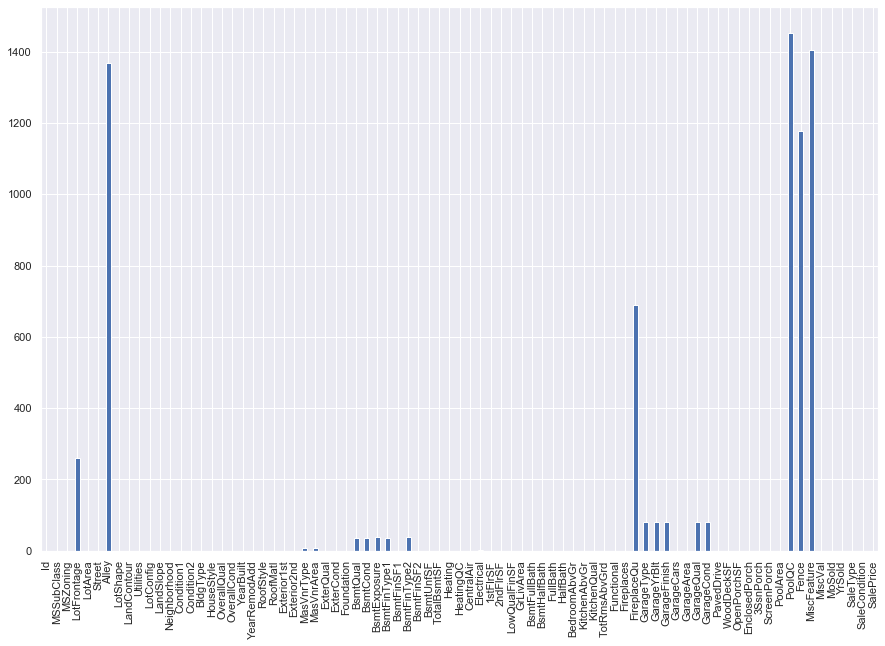

In [9]:
dataset_train.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

In [10]:
#We see from the description of the data features that have most NAN values
missing_features = percent[percent > 0.50].index
dataset_train.drop(missing_features, axis=1, inplace=True)
print(dataset_train.shape)
#Dropping those columns from test dataset
dataset_test.drop(['PoolQC','MiscFeature','Fence','Alley'],axis=1,inplace = True)
print(dataset_test.shape)

(1460, 77)
(1459, 76)


# Distribution of Target Variable

In [11]:
dataset_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

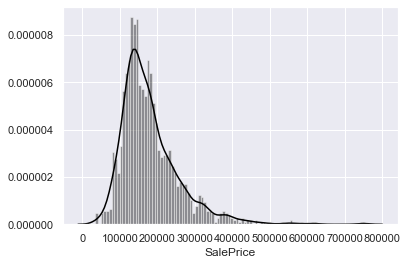

In [12]:
sns.distplot(dataset_train['SalePrice'],color='0', bins=100, hist_kws={'alpha': 0.4});
#skewness and kurtosis
# print("Skewness: %f" % dataset_train['SalePrice'].skew())
# print("Kurtosis: %f" % dataset_train['SalePrice'].kurt())

Since this is a regression problem we assume that the target variable follows normal distribution and Hence we check that using distribution graph

We can see from the graph that the prices are skewed right and some outliers lies above 500,000.SalePrice is not normally distributed.This can reduce the performance of themo dels because some assume normal distribution,hence we take log transformation

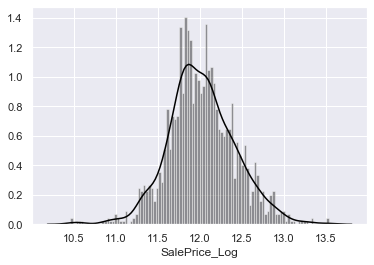

In [13]:
dataset_train['SalePrice_Log'] = np.log(dataset_train['SalePrice'])

sns.distplot(dataset_train['SalePrice_Log'],color='0', bins=100, hist_kws={'alpha': 0.4});

# Imputing Null values with NA for Categorical variables

In [14]:
cat_col_Null = ['MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical', 
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2']
# replace 'NaN' with 'None' in these columns
for col in cat_col_Null:
    dataset_train[col].fillna('NA',inplace=True)
    dataset_test[col].fillna('NA',inplace=True)

# Filling missing values with mean of the feature

In [15]:
# fillna with mean for the remaining columns
dataset_train.fillna(dataset_train.mean(), inplace=True)
dataset_test.fillna(dataset_test.mean(), inplace=True)

In [16]:
dataset_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch 

# Selecting all the columns having numerical values only  

In [17]:
dataset_train.shape

(1460, 78)

In [18]:
numerical =dataset_train.dtypes[dataset_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical))

categorical = dataset_train.dtypes[dataset_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical))

Number of Numerical features:  39
Number of Categorical features:  39


In [19]:
dataset_numerical = dataset_train.select_dtypes(include = ['float64', 'int64'])
dataset_numerical.head()
print(dataset_numerical.shape)

(1460, 39)


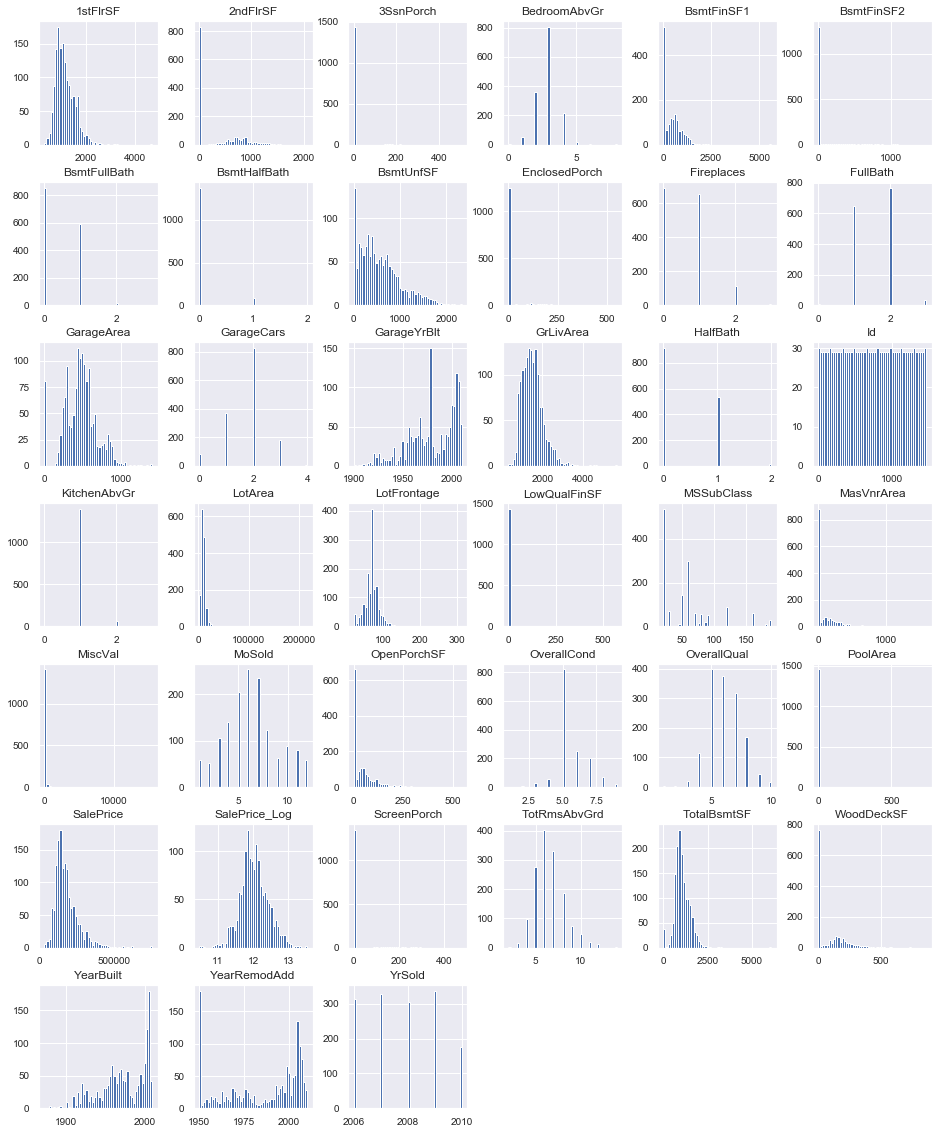

In [20]:
dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10); 

Some of the features are not normally distributed.This can reduce the performance of the models because some assume normal distribution,hence we take log transformation

# Correlation 

In [21]:
dataset_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000070,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.017942
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.073959
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901,0.336156
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.257320
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.817184
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.036868
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.586570
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.565608
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241,0.429531
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.

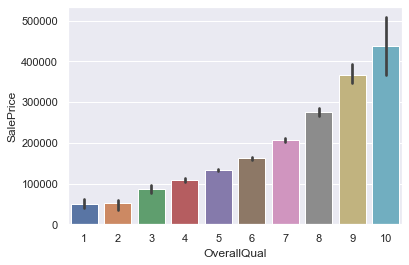

In [22]:
sns.barplot(dataset_train.OverallQual,dataset_train.SalePrice)

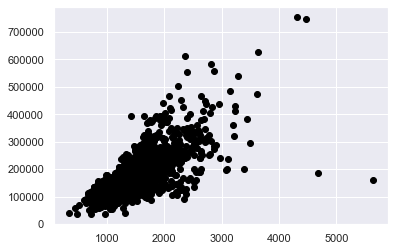

In [23]:
plt.scatter(y=dataset_train.SalePrice,x = dataset_train.GrLivArea,c = 'black')
plt.show()

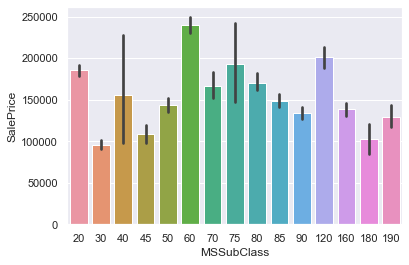

In [24]:
#dataset_train.plot(x='SalePrice', y=['MSSubClass'], kind="bar",figsize=(40, 20))
sns.barplot(dataset_train.MSSubClass,dataset_train.SalePrice)

#### Heat Map

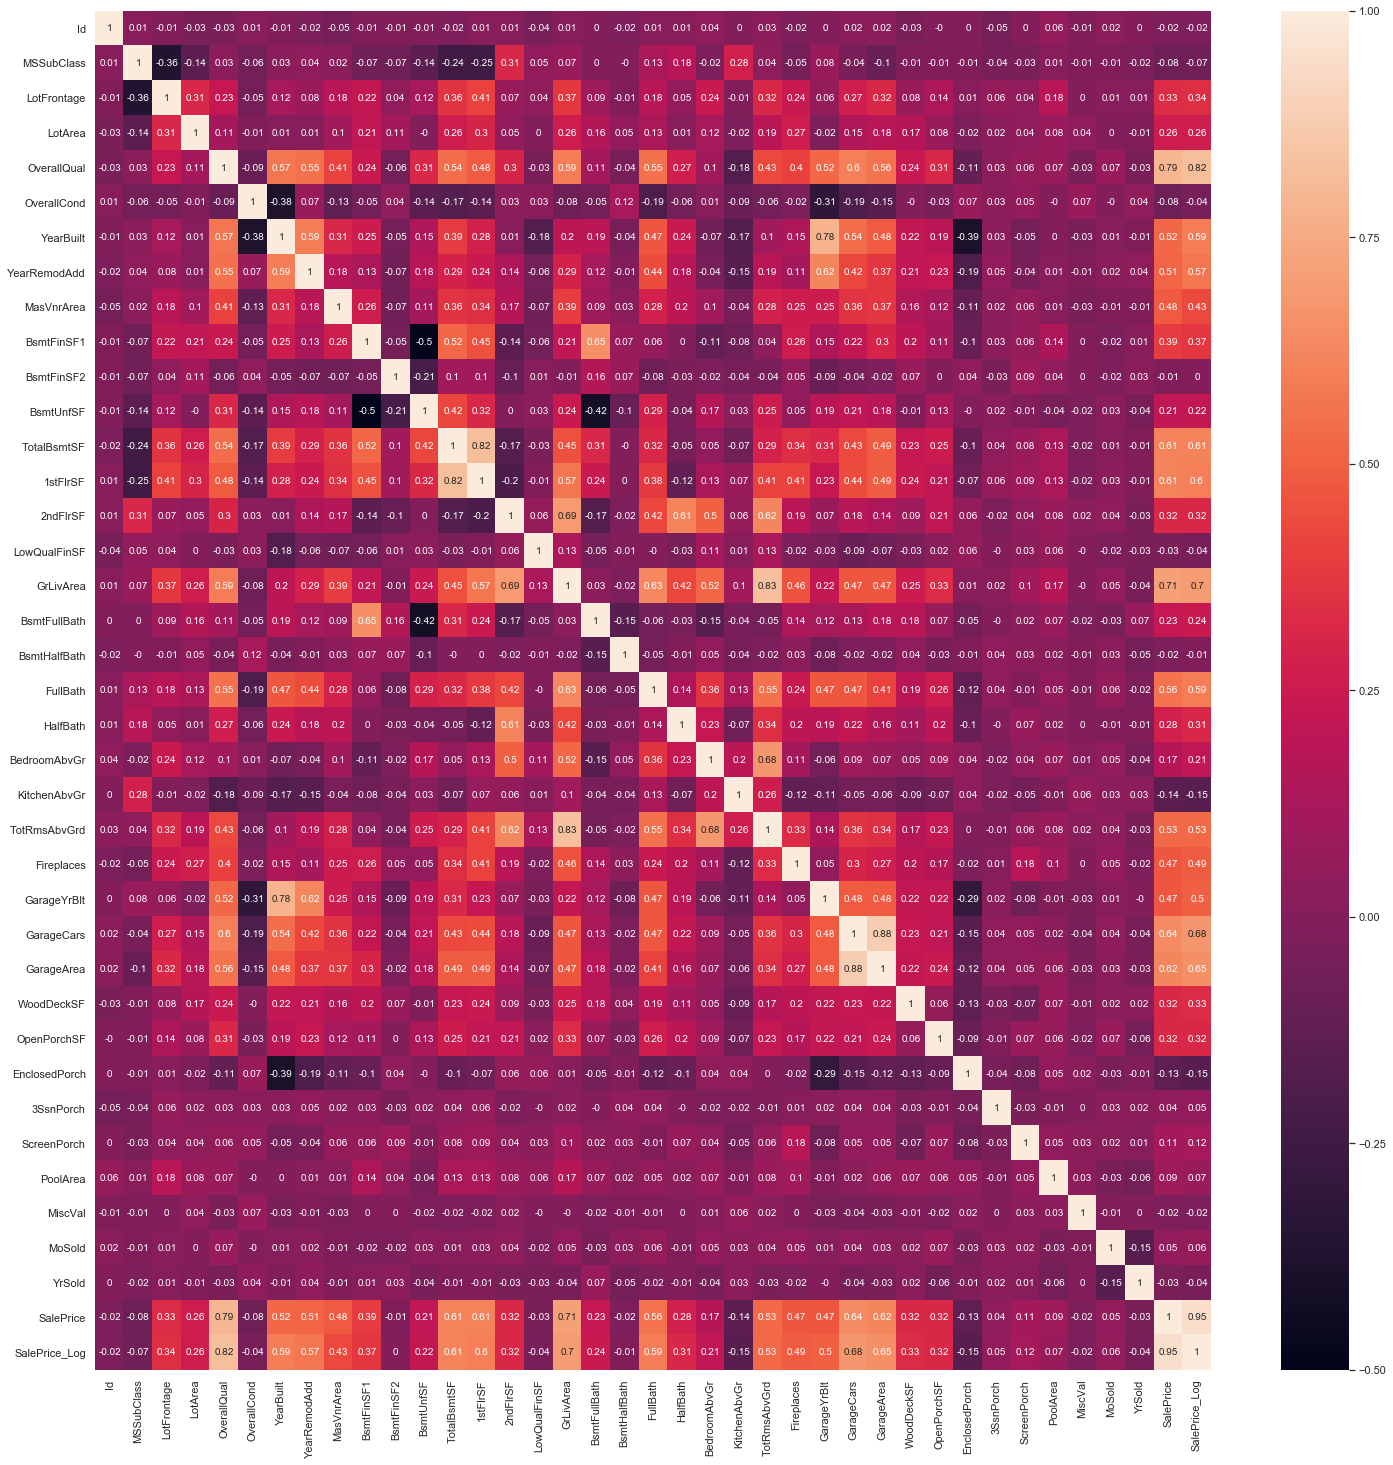

In [25]:
fig, ax = plt.subplots(figsize=(25,25))
correlation_matrix = dataset_train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# Correlation of numerical features in the dataset

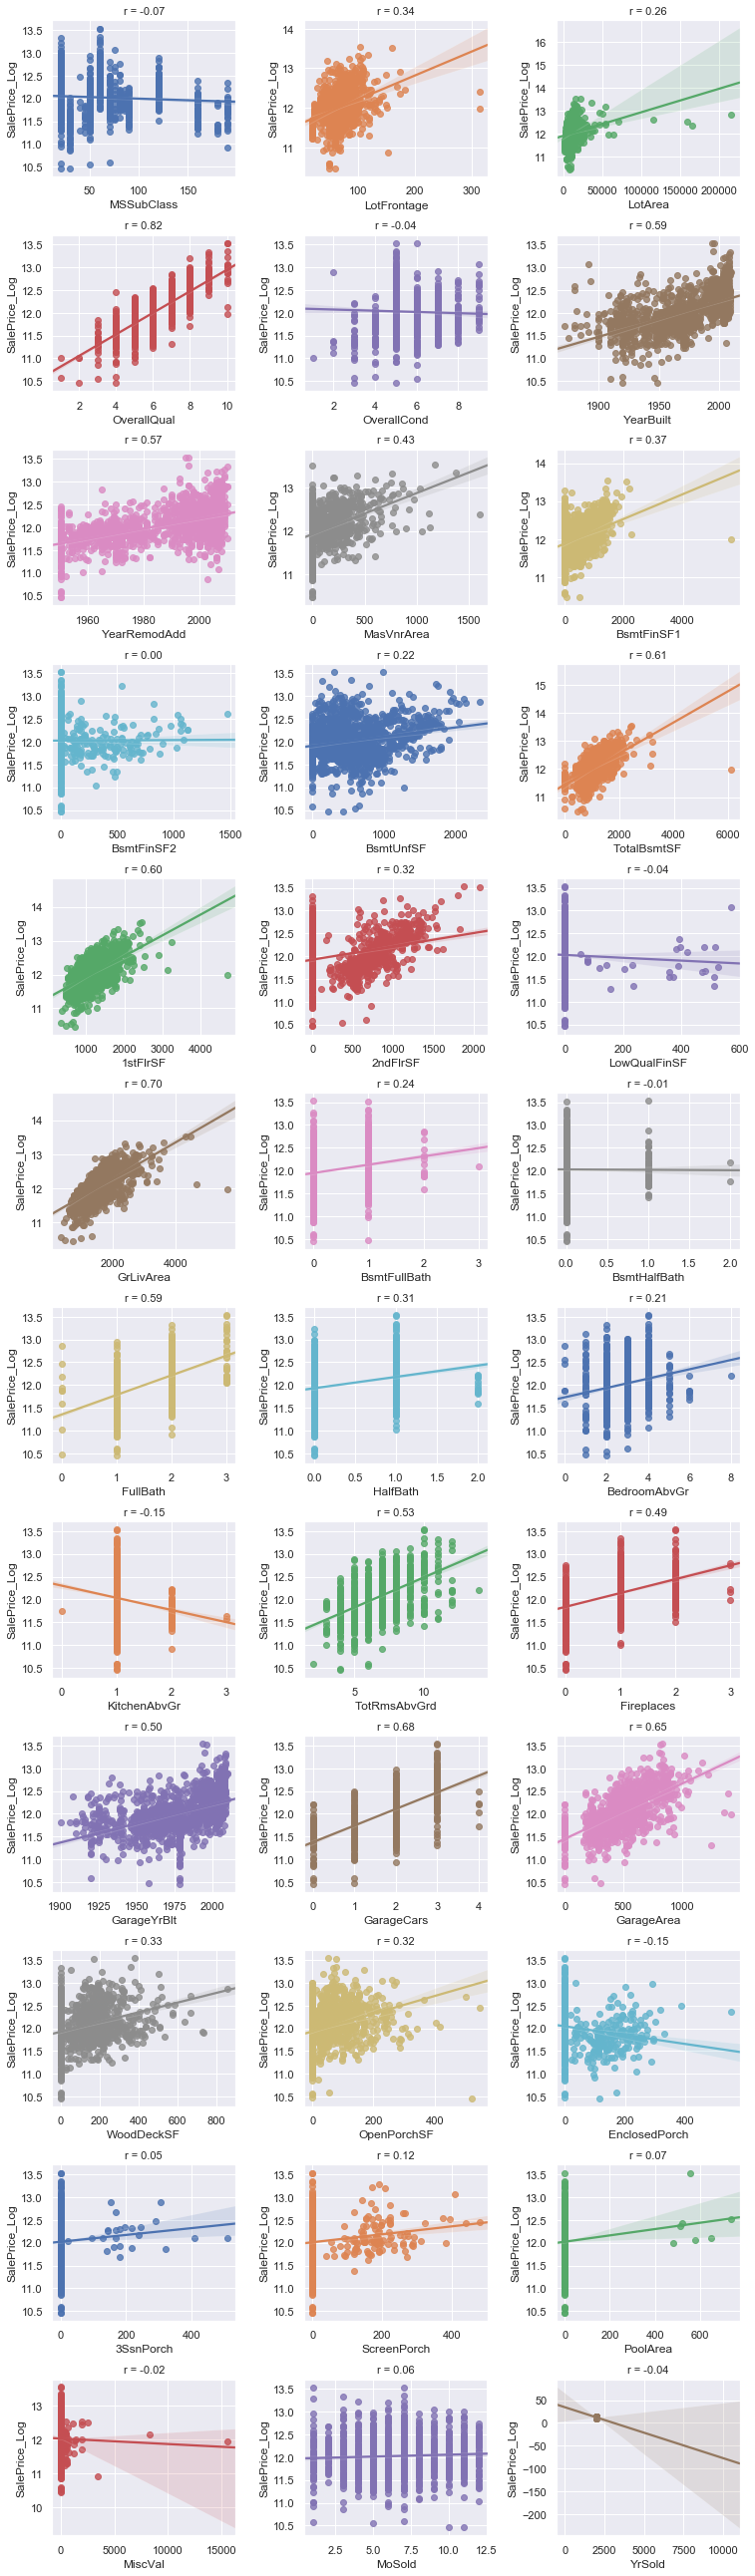

In [26]:
rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols*3.5,rows*3))
li_plot_num_feats = [c for c in list(dataset_numerical) if c not in ['Id', 'SalePrice', 'SalePrice_Log']]


for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(dataset_train[li_plot_num_feats[i]], dataset_train['SalePrice_Log'], ax = axs[r][c])
            stp = stats.pearsonr(dataset_train[li_plot_num_feats[i]], dataset_train['SalePrice_Log'])
            str_title = "r = " + "{0:.2f}".format(stp[0])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show() 

#### All the numerical columns with a minimum Correlation coefficient  value of 0.2

In [27]:
threshold=0.2
correlation = dataset_train.corr()
ser_corr = correlation.abs().nlargest(len(dataset_numerical), 'SalePrice_Log')['SalePrice_Log']

cols_abv_corr_limit = list(ser_corr[ser_corr.values > threshold].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= threshold].index)

### Correlation of Categorical variables with Sales Price

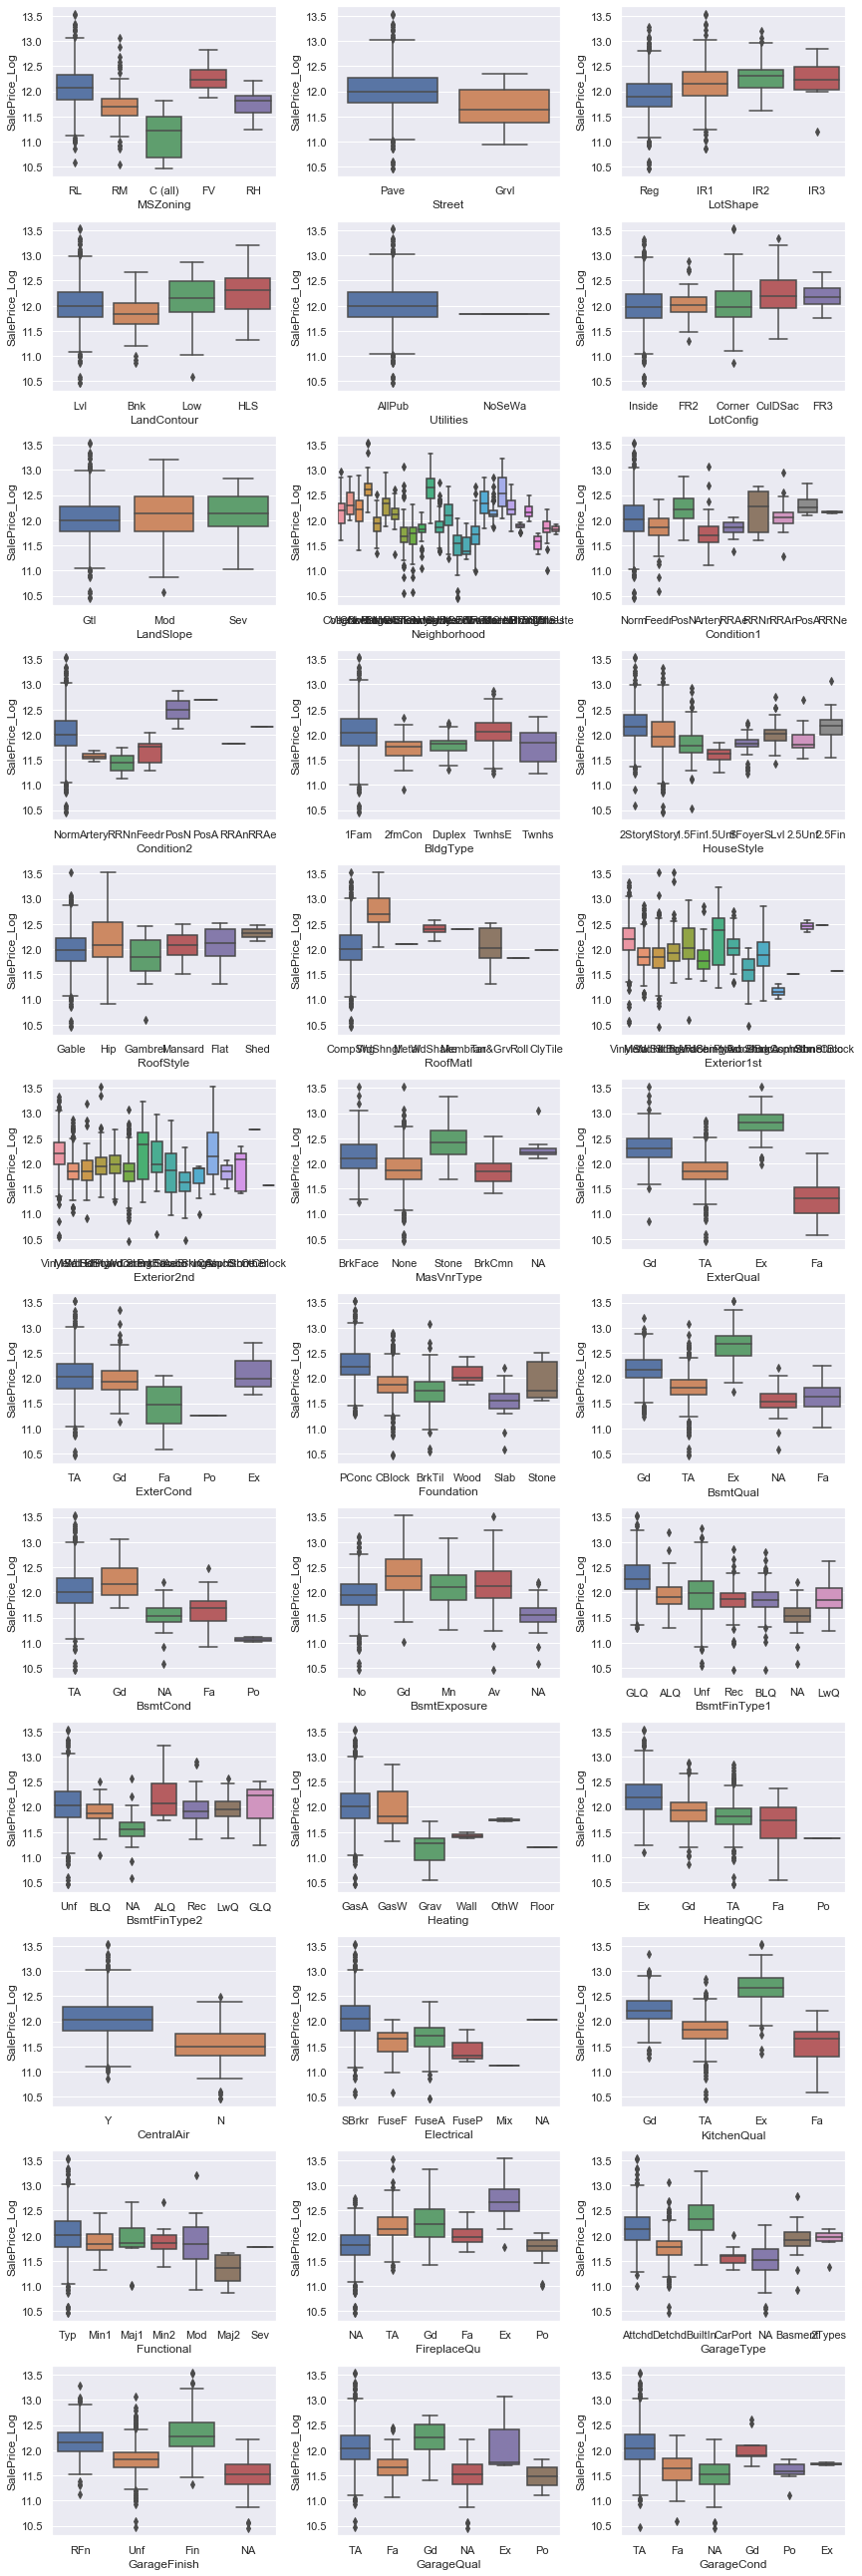

In [28]:
rows = 12
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(cols*4,rows*3))

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(list(categorical)):
            catergorical_fearures=list(categorical)
            sns.boxplot(x=catergorical_fearures[i], y=dataset_train['SalePrice_Log'], data=dataset_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()

In [29]:
threshold=0.2
correlation = dataset_train.corr()
ser_corr = correlation.abs().nlargest(len(categorical), 'SalePrice_Log')['SalePrice_Log']

cat_abv_corr_limit = list(ser_corr[ser_corr.values > threshold].index)
cat_bel_corr_limit = list(ser_corr[ser_corr.values <= threshold].index)

# Dropping fearures which are not strongly correlated with target variable

In [30]:
id_test = dataset_test['Id']

numerical_col_drrop  = cols_bel_corr_limit
categorical_col_drrop = cat_bel_corr_limit

cols_to_drop = ['Id'] + numerical_col_drrop + categorical_col_drrop 

for df in [dataset_train, dataset_test]:
    df.drop(cols_to_drop, inplace= True, axis = 1)

In [31]:
dataset_train.shape

(1460, 64)

In [32]:
dataset_train.drop(['SalePrice'],axis=1, inplace=True)

# Label encoding for categorical variables

In [33]:
from sklearn.preprocessing import LabelEncoder
categorical_cleaned = dataset_train.dtypes[dataset_train.dtypes == "object"].index
categorical_cleaned
for c in categorical_cleaned:
    lbl = LabelEncoder() 
    lbl.fit(list(dataset_train[c].values)) 
    dataset_train[c] = lbl.transform(list(dataset_train[c].values))
    lbl.fit(list(dataset_test[c].values)) 
    dataset_test[c] = lbl.transform(list(dataset_test[c].values))

# shape        
print('Shape all_data: {}'.format(dataset_train.shape))
# shape        
print('Shape all_data: {}'.format(dataset_test.shape))

Shape all_data: (1460, 63)
Shape all_data: (1459, 62)


# Outlier Detection

In [34]:
Q1 = dataset_train.quantile(0.25)
Q3 = dataset_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# dataset_train = dataset_train[~((dataset_train < (Q1 - 1.5 * IQR)) |(dataset_train > (Q3 + 1.5 * IQR))).any(axis=1)]
# dataset_train.shape

MSZoning            0.000000
LotFrontage        19.000000
LotArea          4048.000000
Street              0.000000
LotShape            3.000000
LandContour         0.000000
Utilities           0.000000
LotConfig           2.000000
LandSlope           0.000000
Neighborhood       10.000000
Condition1          0.000000
Condition2          0.000000
BldgType            0.000000
HouseStyle          3.000000
OverallQual         2.000000
YearBuilt          46.000000
YearRemodAdd       37.000000
RoofStyle           0.000000
RoofMatl            0.000000
Exterior1st         4.000000
Exterior2nd         5.000000
MasVnrType          2.000000
MasVnrArea        164.250000
ExterQual           1.000000
ExterCond           0.000000
Foundation          1.000000
BsmtQual            2.000000
BsmtCond            0.000000
BsmtExposure        2.000000
BsmtFinType1        5.000000
                    ...     
TotalBsmtSF       502.500000
Heating             0.000000
HeatingQC           4.000000
CentralAir    

(1460, 63)
(1460, 63)


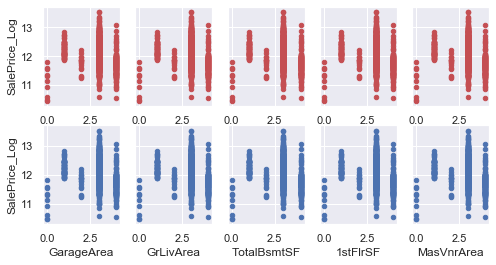

In [36]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(8, 4))
axes = np.ravel(axes)
col_name = ['GarageArea','GrLivArea','TotalBsmtSF','1stFlrSF','MasVnrArea']
for i, c in zip(range(5), col_name):
    dataset_train.plot.scatter(ax=axes[i], x=c, y='SalePrice_Log', sharey=True, colorbar=False, c='r')

# delete outliers
print(dataset_train.shape)
dataset_train['GrLivArea']=dataset_train[(dataset_train['GrLivArea'] <= 1702) | (dataset_train['GrLivArea'] >= 1134)]
dataset_train['GarageArea']=dataset_train[(dataset_train['GarageArea'] <= 576) | (dataset_train['GarageArea'] >= 398)]
dataset_train['TotalBsmtSF']=dataset_train[(dataset_train['TotalBsmtSF'] <= 1253) | (dataset_train['TotalBsmtSF'] >= 864)]
dataset_train['1stFlrSF']=dataset_train[(dataset_train['1stFlrSF'] <= 1295) | (dataset_train['1stFlrSF'] >= 878)]
dataset_train['MasVnrArea']=dataset_train[(dataset_train['MasVnrArea'] <= 132) | (dataset_train['MasVnrArea'] >= 0)]


print(dataset_train.shape)

for i, c in zip(range(5,10), col_name):
    dataset_train.plot.scatter(ax=axes[i], x=c, y='SalePrice_Log', sharey=True, colorbar=False, c='b')

# Normalizing the dataset

In [37]:
dataset_train_ml = dataset_train.loc[:, dataset_train.columns != 'SalePrice_Log']
dataset_test_ml  = dataset_test.copy()

y = dataset_train['SalePrice_Log']
dataset_train_ml.shape

(1460, 62)

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dataset_train_ml_sc = sc.fit_transform(dataset_train_ml)
dataset_test_ml_sc = sc.transform(dataset_test_ml)

# Splitting data into x and y for ML algorithms

In [39]:
X = dataset_train_ml
X_test_final = dataset_test_ml

X_sc = dataset_train_ml_sc.copy()
y_sc = y
X_test_sc = dataset_test_ml_sc.copy()

X.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
MSZoning         1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
MasVnrType       1460 non-null int64
MasVnrArea       1460 non-null float64
ExterQual        1460 non-null int64
E

NameError: name 'X_test' is not defined


# Modeling

In [40]:
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

In [43]:

linearreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
linear = GridSearchCV(linearreg, parameters, cv=5, verbose=1 , scoring = score_calc)
linear.fit(X_train, y_train)

sc_linear = np.sqrt(-linear.best_score_)
print( "Best score:",sc_linear)
print("______________________\n")
linear_params=linear.best_params_
print(linear_params)
print("______________________\n")
linear_estimator=linear.best_estimator_
print(linear_estimator)
pred_linear = linear.predict(X_test)
print("______________________\n")
lr_ac=r2_score(y_test,pred_linear)
print('The accuracy of the Linear Regression is',r2_score(y_test,pred_linear))
print("______________________\n")
print ('RMSE is:', mean_squared_error(y_test, pred_linear))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best score: 0.16045536540471464
______________________

{'copy_X': True, 'fit_intercept': True, 'normalize': False}
______________________

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
______________________

The accuracy of the Linear Regression is 0.8685257130426551
______________________

RMSE is: 0.02281810217710193


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


In [44]:
pred_linear_final = linear.predict(X_test_final)

In [45]:
#Gradient Boosting Algorithm

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(n_estimators=4780, learning_rate=0.01,
                                   max_depth=10, max_features='sqrt',
                                   min_samples_leaf=1, min_samples_split=250, 
                                   loss='huber', random_state =6).fit(X_train,y_train)
gbr_linear = np.sqrt(-linear.best_score_)
print( "Best score:",gbr_linear)
print("______________________\n")
gbr_estimator=linear.best_estimator_
print(gbr_estimator)
gbr_pred = gbr_model.predict(X_test)
print("______________________\n")
gb_ac=r2_score(y_test,gbr_pred)
print('The accuracy of the Gradient boost is',r2_score(y_test,gbr_pred))
print("______________________\n")
print ('RMSE is:', mean_squared_error(y_test,gbr_pred))
print("______________________\n")

Best score: 0.16045536540471464
______________________

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
______________________

The accuracy of the Gradient boost is 0.9141151479366143
______________________

RMSE is: 0.014905799264638166
______________________



In [49]:
pred_gbr_final = gbr_model.predict(X_test_final)

In [50]:
#KNN Regressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y_sc, test_size=0.2, random_state=1)  
param_grid = {'n_neighbors' : [3,4,5,6,7,10] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, refit=True, verbose=1, scoring = score_calc)
knn.fit(X_train_sc, y_train_sc)

sc_knn = np.sqrt(-knn.best_score_)
print( "Best score:",sc_knn)
print("______________________\n")
knn_estimator=knn.best_estimator_
print(knn_estimator)
print("______________________\n")
knn_pred = knn.predict(X_test_sc)
kn_ac=r2_score(y_test_sc,knn_pred)
print('The accuracy of the KNN is',r2_score(y_test_sc,knn_pred))
print("______________________\n")
print ('RMSE is:', mean_squared_error(y_test_sc,knn_pred))
print("______________________\n")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.20204575267995586
______________________

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='distance')
______________________

The accuracy of the KNN is 0.793469985023379
______________________

RMSE is: 0.03584444603912461
______________________



[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    2.1s finished


In [52]:
pred_knn_final = knn.predict(X_test_final)

In [53]:
#Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] , 'random_state': [5] }
            
dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, refit=True, verbose=1, scoring = score_calc)
dtree.fit(X_train_sc, y_train_sc)

sc_dtree = np.sqrt(-dtree.best_score_)
print( "Best score:",sc_dtree)
print("______________________\n")
dtree_estimator=dtree.best_estimator_
print(dtree_estimator)
print("______________________\n")
pred_dtree = dtree.predict(X_test_sc)
dt_ac=r2_score(y_test_sc,pred_dtree)
print('The accuracy of the Decision tree is',r2_score(y_test_sc,pred_dtree))
print("______________________\n")
print ('RMSE is:', mean_squared_error(y_test_sc,pred_dtree))
print("______________________\n")

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.21243652351676198
______________________

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=13,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=True, random_state=5, splitter='best')
______________________

The accuracy of the Decision tree is 0.668312554107702
______________________

RMSE is: 0.057566222311499764
______________________



[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:    5.8s finished


In [55]:
pred_dtree_final = dtree.predict(X_test_final)

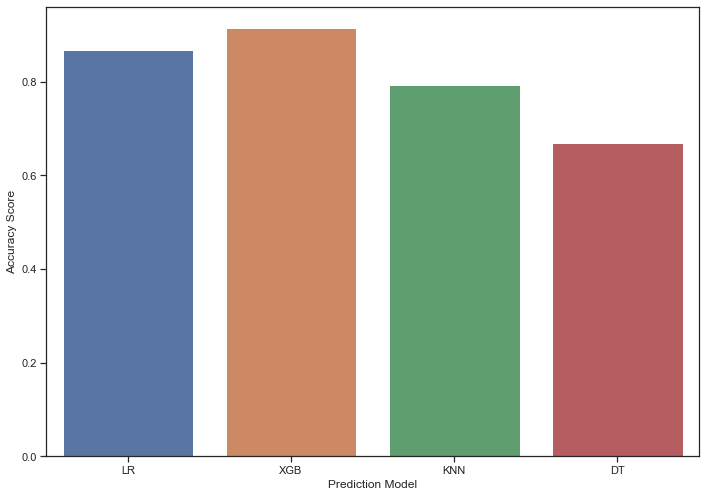

In [56]:
names=['LR','XGB','KNN','DT']
results=[]
results.append(lr_ac)
results.append((gb_ac))
results.append((kn_ac))
results.append((dt_ac)) 

sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
g=sns.barplot(names, results)
g.set(xlabel='Prediction Model', ylabel='Accuracy Score')
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [57]:
predictions = {'Linear': pred_linear_final, 'DT': pred_dtree_final, 'XGB':pred_gbr_final,
               'KNN': pred_knn_final}
df_predictions = pd.DataFrame(data=predictions) 


In [58]:
df_predictions.corr()

,Linear,DT,XGB,KNN
Linear,1.000000,-0.193767,-0.788453,0.150659
DT,-0.193767,1.000000,0.276783,-0.044161
XGB,-0.788453,0.276783,1.000000,-0.100390
KNN,0.150659,-0.044161,-0.100390,1.000000
